# [Object Detection using PyTorch Faster R-CNN MobileNetV3](https://debuggercafe.com/object-detection-using-pytorch-faster-r-cnn-mobilenetv3)
![](https://debuggercafe.com/wp-content/uploads/2021/03/Object-Detection-using-PyTorch-Faster-R-CNN-MobileNetV3-copy-e1617153888534.jpg)

## <font color="green">Make sure that GPU is enabled before moving ahead.</font>

## Download the Input File

In [1]:
import requests
url = "https://drive.google.com/uc?id=140fl292Ofs6tmEJzIFUPGo97AdIIO3vi&export=download"
r = requests.get(url)
with open('input.zip', 'wb') as f:
    f.write(r.content)

## Setup

In [5]:
!mkdir outputs

In [6]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = 21, 18

## COCO Names Python File

In [7]:
%%writefile coco_names.py
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


Writing coco_names.py


## Detection Utility Script

In [8]:
%%writefile detect_utils.py
import torchvision.transforms as transforms
import cv2
import numpy as np

from coco_names import COCO_INSTANCE_CATEGORY_NAMES as coco_names

# this will help us create a different color for each class
COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))

# define the torchvision image transforms
transform = transforms.Compose([
    transforms.ToTensor(),
])

def predict(image, model, device, detection_threshold):
    # transform the image to tensor
    image = transform(image).to(device)
    image = image.unsqueeze(0) # add a batch dimension
    outputs = model(image) # get the predictions on the image

    # get all the predicited class names
    pred_classes = [coco_names[i] for i in outputs[0]['labels'].cpu().numpy()]

    # get score for all the predicted objects
    pred_scores = outputs[0]['scores'].detach().cpu().numpy()

    # get all the predicted bounding boxes
    pred_bboxes = outputs[0]['boxes'].detach().cpu().numpy()
    # get boxes above the threshold score
    boxes = pred_bboxes[pred_scores >= detection_threshold].astype(np.int32)

    return boxes, pred_classes, outputs[0]['labels']

def draw_boxes(boxes, classes, labels, image):
    image = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2RGB)
    for i, box in enumerate(boxes):
        color = COLORS[labels[i]]
        cv2.rectangle(
            image,
            (int(box[0]), int(box[1])),
            (int(box[2]), int(box[3])),
            color, 2
        )
        cv2.putText(image, classes[i], (int(box[0]), int(box[1]-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2,
                    lineType=cv2.LINE_AA)
    return image


Writing detect_utils.py


## Object Detection in Images

In [ ]:
%%writefile detect_img.py
import torchvision
import torch
import argparse
import cv2
import detect_utils

from PIL import Image

# construct the argument parser
parser = argparse.ArgumentParser()
parser.add_argument('-i', '--input', help='path to input image/video')
args = vars(parser.parse_args())

# define the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# load the model
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
# load the model on to the computation device
model.eval().to(device)

# read the image and run the inference for detections
image = Image.open(args['input'])
boxes, classes, labels = detect_utils.predict(image, model, device, 0.7)
image = detect_utils.draw_boxes(boxes, classes, labels, image)
# cv2.imshow('Image', image)
save_name = f"{args['input'].split('/')[-1].split('.')[0]}"
cv2.imwrite(f"outputs/{save_name}.jpg", image)
# cv2.waitKey(0)

Writing detect_img.py


In [ ]:
!pip install 

In [12]:
!python detect_img.py --input input/image_1.jpg
!python detect_img.py --input input/image_2.jpg

c:\Users\mzarrar\AppData\Local\miniconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mzarrar\AppData\Local\miniconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to C:\Users\mzarrar/.cache\torch\hub\checkpoints\fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth

0.2%
0.3%
0.5%
0.7%
0.8%
1.0%
1.2%
1.3%
1.5%
1.7%
1.9%
2.0%
2.2%
2.4%
2.5%
2.7%
2.

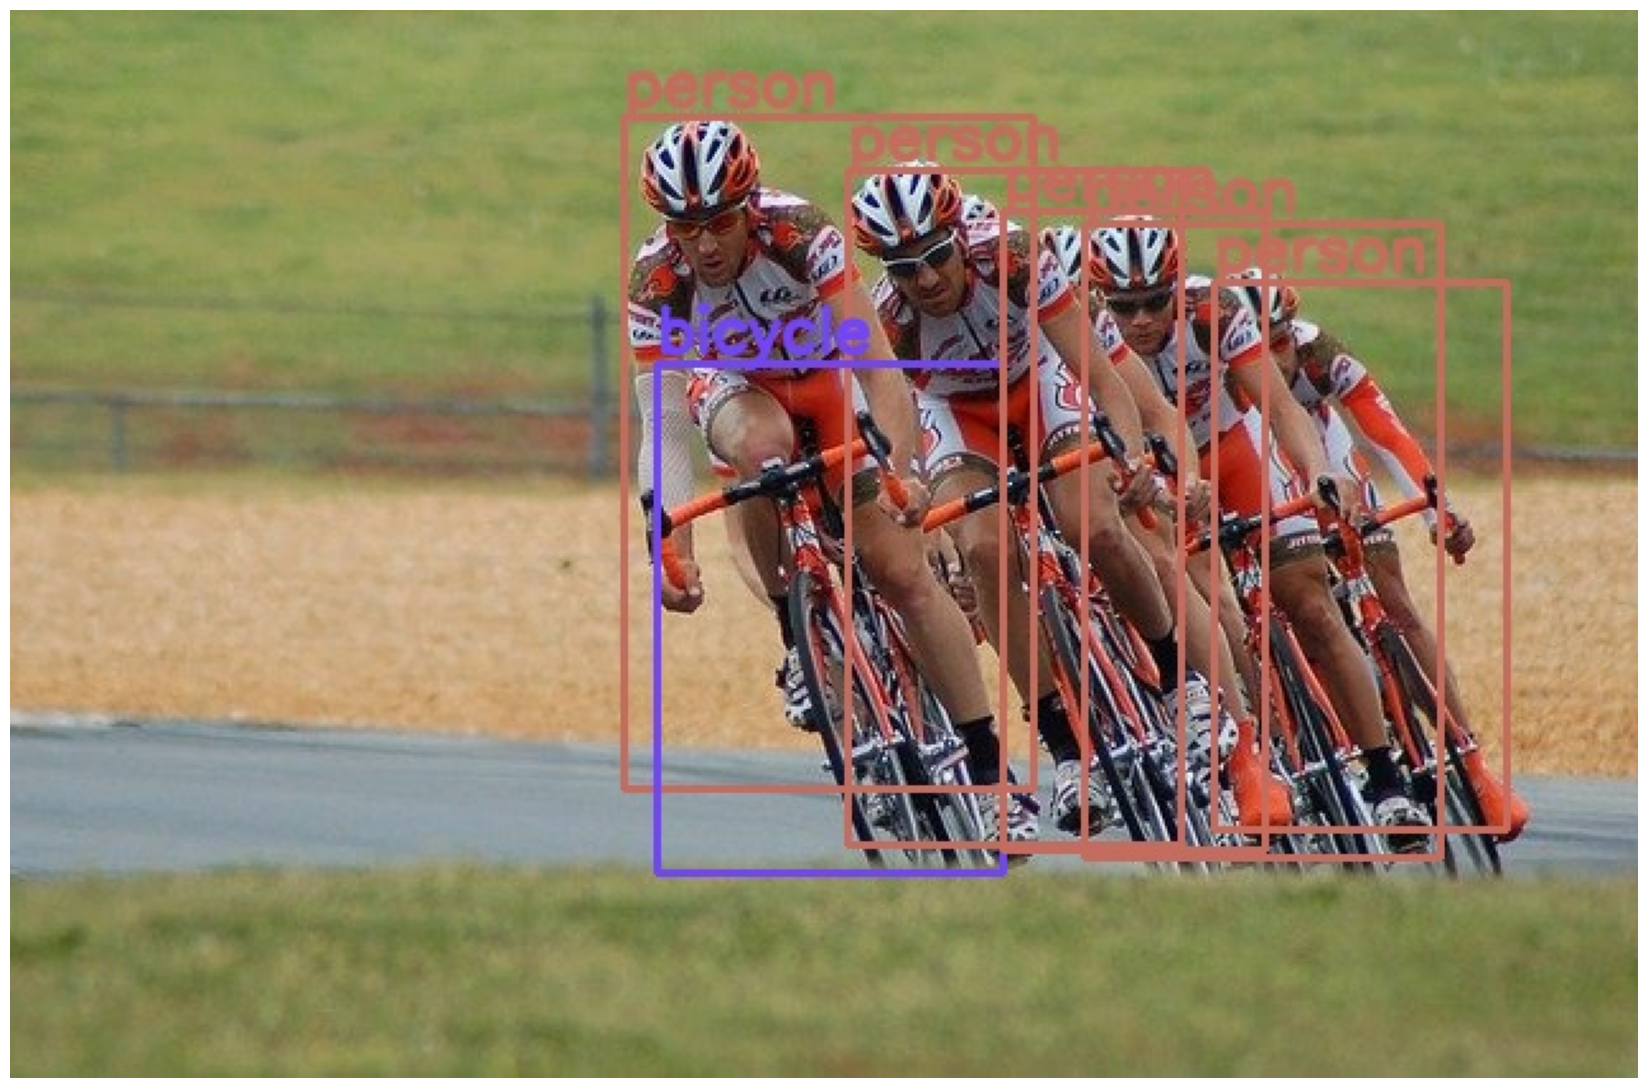

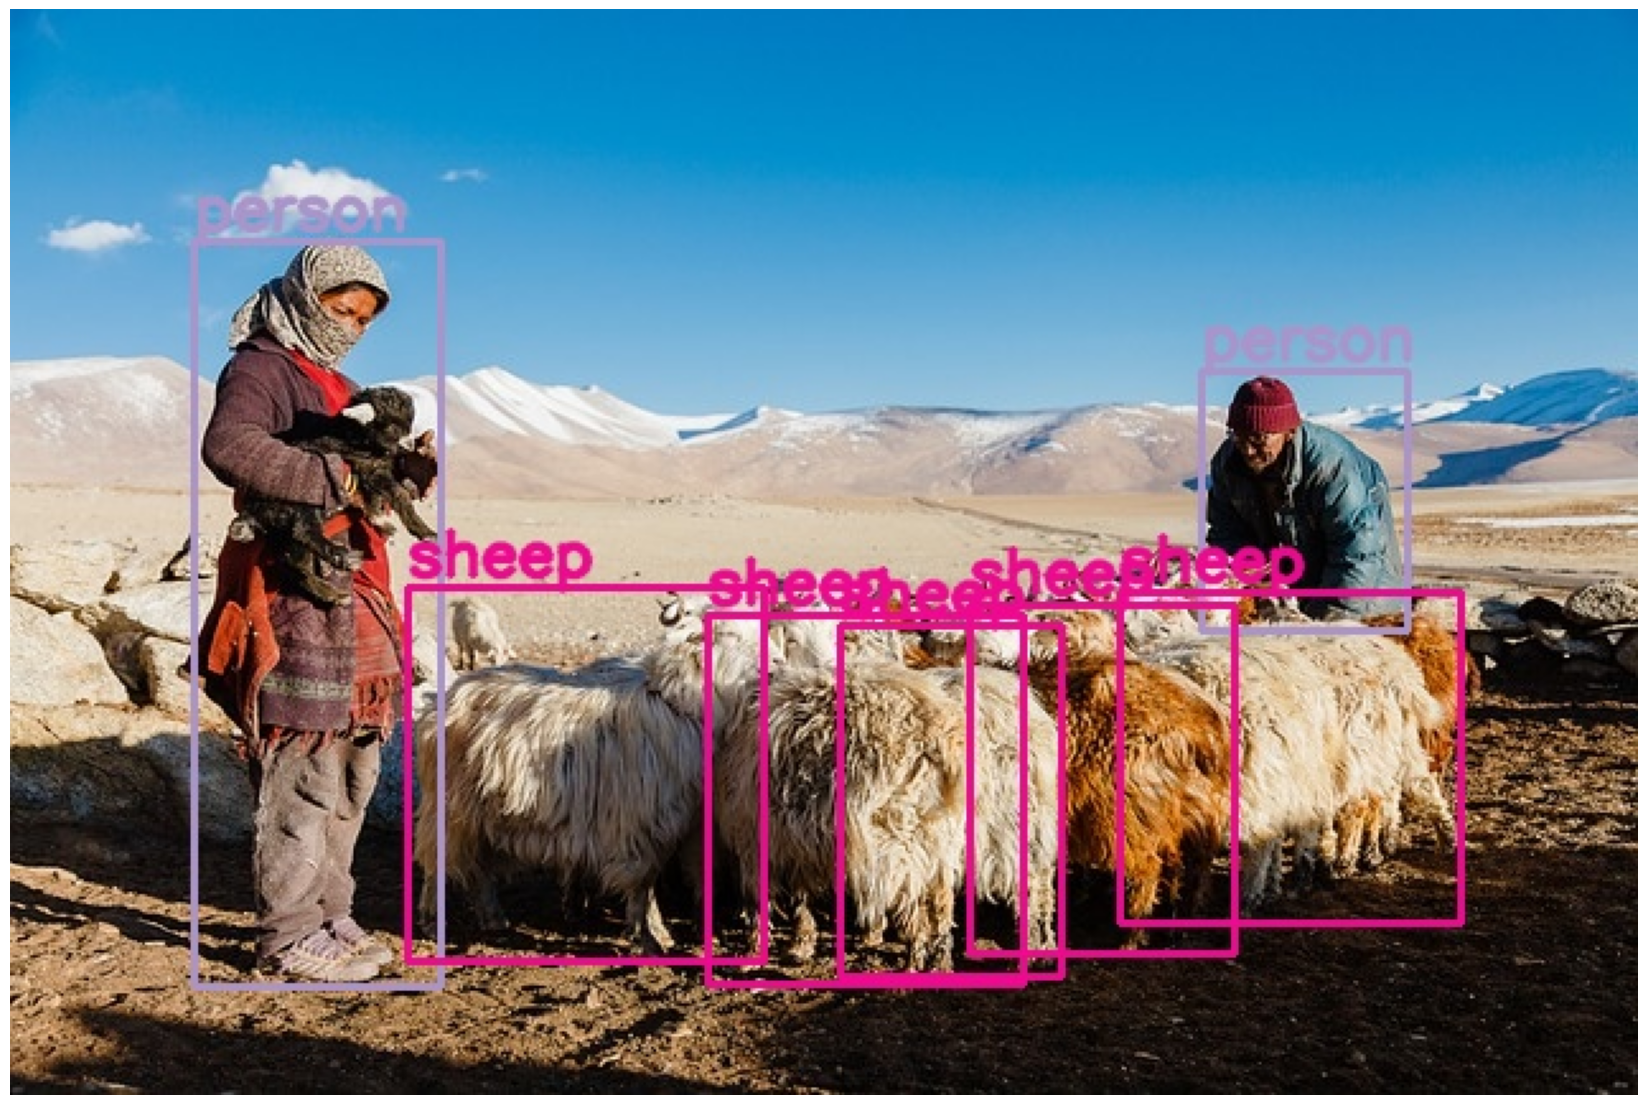

In [13]:
image_1 = plt.imread('outputs/image_1.jpg')
image_2 = plt.imread('outputs/image_2.jpg')

plt.imshow(image_1)
plt.axis('off')
plt.show()

plt.imshow(image_2)
plt.axis('off')
plt.show()

## Object Detection in Videos

### <font color="red">Visualization of videos is not very well supported on Colab. After detection in videos, you can download the outputs and visualize them on your machine.</font>

In [14]:
%%writefile detect_vid.py
import torchvision
import cv2
import torch
import argparse
import time
import detect_utils

# construct the argument parser
parser = argparse.ArgumentParser()
parser.add_argument('-i', '--input', help='path to input video')
args = vars(parser.parse_args())

# define the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# load the model
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
# load the model onto the computation device
model = model.eval().to(device)

cap = cv2.VideoCapture(args['input'])

if (cap.isOpened() == False):
    print('Error while trying to read video. Please check path again')

# get the frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

save_name = f"{args['input'].split('/')[-1].split('.')[0]}"
# define codec and create VideoWriter object
out = cv2.VideoWriter(f"outputs/{save_name}.mp4",
                      cv2.VideoWriter_fourcc(*'mp4v'), 30,
                      (frame_width, frame_height))

frame_count = 0 # to count total frames
total_fps = 0 # to get the final frames per second

# read until end of video
while(cap.isOpened()):
    # capture each frame of the video
    ret, frame = cap.read()
    if ret == True:
        # get the start time
        start_time = time.time()
        with torch.no_grad():
            # get predictions for the current frame
            boxes, classes, labels = detect_utils.predict(frame, model, device, 0.7)

        # draw boxes and show current frame on screen
        image = detect_utils.draw_boxes(boxes, classes, labels, frame)

        # get the end time
        end_time = time.time()
        # get the fps
        fps = 1 / (end_time - start_time)
        # add fps to total fps
        total_fps += fps
        # increment frame count
        frame_count += 1
        print(f"Frame counter: {frame_count}, FPS: {fps}")
        # write the FPS on the current frame
        cv2.putText(image, f"{fps:.3f} FPS", (15, 30), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 255, 0), 2)
        # press `q` to exit
        wait_time = max(1, int(fps/4))
        # convert from BGR to RGB color format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.imshow('image', image)
        # out.write(image)
        if cv2.waitKey(wait_time) & 0xFF == ord('q'):
            break

    else:
        break

# release VideoCapture()
cap.release()
# close all frames and video windows
cv2.destroyAllWindows()

# calculate and print the average FPS
avg_fps = total_fps / frame_count
print(f"Average FPS: {avg_fps:.3f}")


Writing detect_vid.py


In [15]:
!python detect_vid.py --input input/video_1.mp4

Frame counter: 1, FPS: 2.262478059221492
Frame counter: 2, FPS: 9.091587747838357
Frame counter: 3, FPS: 18.51863429451943
Frame counter: 4, FPS: 18.86784915811587
Frame counter: 5, FPS: 17.857144681775026
Frame counter: 6, FPS: 18.51863429451943
Frame counter: 7, FPS: 19.999446884193762
Frame counter: 8, FPS: 18.181480855343295
Frame counter: 9, FPS: 19.999923706345726
Frame counter: 10, FPS: 19.606697768345473
Frame counter: 11, FPS: 20.407855043693193
Frame counter: 12, FPS: 19.999828340096414
Frame counter: 13, FPS: 18.518225487425827
Frame counter: 14, FPS: 19.607431023682416
Frame counter: 15, FPS: 18.519288423413677
Frame counter: 16, FPS: 17.54388371849838
Frame counter: 17, FPS: 18.867509660238504
Frame counter: 18, FPS: 18.86708530507224
Frame counter: 19, FPS: 20.407358572269608
Frame counter: 20, FPS: 17.857524821608
Frame counter: 21, FPS: 19.607706008573658
Frame counter: 22, FPS: 19.231016822481326
Frame counter: 23, FPS: 21.276734760134126
Frame counter: 24, FPS: 19.999

c:\Users\mzarrar\AppData\Local\miniconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mzarrar\AppData\Local\miniconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
!python detect_vid.py --input input/video_2.mp4

Frame counter: 1, FPS: 2.4570438059040933
Frame counter: 2, FPS: 9.34603446239686
Frame counter: 3, FPS: 8.928990505385958
Frame counter: 4, FPS: 18.870225985396207
Frame counter: 5, FPS: 17.24227463135696
Frame counter: 6, FPS: 18.869631722437667
Frame counter: 7, FPS: 17.24291258304282
Frame counter: 8, FPS: 18.8701410883962
Frame counter: 9, FPS: 16.13231074563259
Frame counter: 10, FPS: 18.183451397258374
Frame counter: 11, FPS: 18.870480680979718
Frame counter: 12, FPS: 18.870480680979718
Frame counter: 13, FPS: 18.51912488685785
Frame counter: 14, FPS: 15.626307220589167
Frame counter: 15, FPS: 16.951066134273105
Frame counter: 16, FPS: 16.95079211121888
Frame counter: 17, FPS: 17.24227463135696
Frame counter: 18, FPS: 17.241920234150832
Frame counter: 19, FPS: 16.951203149122595
Frame counter: 20, FPS: 18.18321490967577
Frame counter: 21, FPS: 17.545131307046827
Frame counter: 22, FPS: 17.857981010771915
Frame counter: 23, FPS: 18.1847127682636
Frame counter: 24, FPS: 18.1848704

c:\Users\mzarrar\AppData\Local\miniconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mzarrar\AppData\Local\miniconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from google.colab import files

!zip -r outputs outputs

  adding: outputs/ (stored 0%)
  adding: outputs/video_2.mp4 (deflated 1%)
  adding: outputs/video_1.mp4 (deflated 1%)
  adding: outputs/image_2.jpg (deflated 1%)
  adding: outputs/image_1.jpg (deflated 2%)


In [22]:
import os
import torch
from PIL import Image
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset

class YOLOStyleDataset(Dataset):
    """
    A PyTorch Dataset that reads images and YOLO-style annotations:
      class_id  x_center_norm  y_center_norm  width_norm  height_norm
    and converts them into the format expected by TorchVision detection models.
    """
    def __init__(self, root, transforms=None):
        """
        Args:
            root (str): Path to a folder containing 'images/' and 'labels/' subfolders.
            transforms (callable, optional): A function/transform that takes in a PIL image
                                             and returns a transformed version.
        """
        self.root = root
        self.transforms = transforms
        
        self.img_dir = os.path.join(root, "images")
        self.lbl_dir = os.path.join(root, "labels")
        
        # Gather all image filenames
        self.imgs = [f for f in os.listdir(self.img_dir)
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        self.imgs.sort()  # optional: sort for consistent ordering

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        # 1) Load the image
        img_name = self.imgs[idx]
        img_path = os.path.join(self.img_dir, img_name)
        img = Image.open(img_path).convert("RGB")
        w, h = img.size  # image width and height in pixels

        # 2) Load the label file
        label_name = os.path.splitext(img_name)[0] + ".txt"
        label_path = os.path.join(self.lbl_dir, label_name)
        
        boxes = []
        labels = []
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    # YOLO format: class_id x_center_norm y_center_norm width_norm height_norm
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue
                    class_id = int(parts[0])
                    x_center_norm = float(parts[1])
                    y_center_norm = float(parts[2])
                    width_norm    = float(parts[3])
                    height_norm   = float(parts[4])
                    
                    # Convert normalized coords to pixel coords
                    x_center = x_center_norm * w
                    y_center = y_center_norm * h
                    box_width = width_norm * w
                    box_height = height_norm * h
                    
                    # Convert center/width/height to x_min, y_min, x_max, y_max
                    x_min = x_center - (box_width / 2)
                    x_max = x_center + (box_width / 2)
                    y_min = y_center - (box_height / 2)
                    y_max = y_center + (box_height / 2)
                    
                    boxes.append([x_min, y_min, x_max, y_max])
                    labels.append(class_id)
        
        # Convert everything to torch tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        
        # Additional fields required by torchvision detection models
        image_id = torch.tensor([idx])
        area = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])  # (xmax - xmin) * (ymax - ymin)
        iscrowd = torch.zeros((len(labels),), dtype=torch.int64)
        
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }
        
        # Apply optional transforms (e.g. ToTensor, normalization, augmentation)
        if self.transforms is not None:
            img = self.transforms(img)
        
        return img, target

if __name__ == "__main__":
    # Example usage
    dataset_root = "dataset"  # path to folder containing 'images' and 'labels'
    
    # Example transforms: convert to tensor, optionally normalize or augment
    transforms = T.Compose([
        T.ToTensor()
    ])
    
    # Create dataset
    yolo_dataset = YOLOStyleDataset(root=dataset_root, transforms=transforms)
    
    # Create a DataLoader for batch processing
    data_loader = DataLoader(
        yolo_dataset,
        batch_size=2,
        shuffle=True,
        collate_fn=lambda batch: tuple(zip(*batch))  # required for detection models
    )
    
    # Check one batch
    images, targets = next(iter(data_loader))
    print(f"Loaded {len(images)} images in this batch.")
    print("Image 0 shape:", images[0].shape)
    print("Targets for image 0:", targets[0])


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset\\images'

In [25]:
import os
import torch
from PIL import Image
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

class YOLOStyleDataset(Dataset):
    """
    A dataset that reads images and YOLO-format annotations from a folder.
    Expected structure:
        root/
          images/
            img1.jpg
            img2.jpg
            ...
          labels/
            img1.txt
            img2.txt
            ...
    Each label file should contain lines:
        class_id  x_center_norm  y_center_norm  width_norm  height_norm
    """
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms
        
        self.img_dir = os.path.join(root, "images")
        self.lbl_dir = os.path.join(root, "labels")
        
        # List image files (jpg, png, etc.)
        self.imgs = [f for f in os.listdir(self.img_dir) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        self.imgs.sort()  # optional for consistency

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        # Load image
        img_name = self.imgs[idx]
        img_path = os.path.join(self.img_dir, img_name)
        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        # Load annotations from corresponding label file
        label_name = os.path.splitext(img_name)[0] + ".txt"
        label_path = os.path.join(self.lbl_dir, label_name)
        
        boxes = []
        labels = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue
                    class_id = int(parts[0])
                    x_center_norm = float(parts[1])
                    y_center_norm = float(parts[2])
                    width_norm    = float(parts[3])
                    height_norm   = float(parts[4])
                    
                    # Convert normalized coordinates to absolute pixel coordinates
                    x_center = x_center_norm * w
                    y_center = y_center_norm * h
                    box_width = width_norm * w
                    box_height = height_norm * h
                    x_min = x_center - box_width / 2
                    y_min = y_center - box_height / 2
                    x_max = x_center + box_width / 2
                    y_max = y_center + box_height / 2
                    boxes.append([x_min, y_min, x_max, y_max])
                    labels.append(class_id)
        
        # Convert lists to torch tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # Handle case of no bounding boxes: ensure boxes tensor has shape [0, 4]
        if boxes.dim() == 1:
            boxes = boxes.reshape((0, 4))
        labels = torch.as_tensor(labels, dtype=torch.int64)
        
        image_id = torch.tensor([idx])
        # Compute area if boxes are present
        if boxes.size(0) > 0:
            area = (boxes[:,2] - boxes[:,0]) * (boxes[:,3] - boxes[:,1])
        else:
            area = torch.tensor([], dtype=torch.float32)
        iscrowd = torch.zeros((labels.shape[0],), dtype=torch.int64)
        
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }
        
        if self.transforms:
            img = self.transforms(img)
        
        return img, target

if __name__ == "__main__":
    # --- Define transforms ---
    # Convert image to tensor and normalize. Adjust if you add augmentations.
    transforms = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
    ])
    
    # --- Create dataset and dataloader ---
    # Assume your dataset is stored in 'new_dataset/train' with 'images/' and 'labels/' subfolders.
    dataset_root = "new_dataset\\train"  # Change path as needed (use forward slashes if preferred)
    train_dataset = YOLOStyleDataset(root=dataset_root, transforms=transforms)
    train_loader = DataLoader(
        train_dataset,
        batch_size=4,
        shuffle=True,
        collate_fn=lambda batch: tuple(zip(*batch))
    )
    
    # --- Load and modify the model ---
    # Load a pre-trained Faster R-CNN with MobileNet V3 backbone
    model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # Modify for 2 classes: background and rat
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # --- Define optimizer ---
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
    
    # --- Training loop (simplified) ---
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        for images, targets in train_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            optimizer.zero_grad()
            losses.backward()
            optimizer.step()
            epoch_loss += losses.item()
        print(f"Epoch {epoch+1}: Loss: {epoch_loss:.4f}")
         # Save model after each epoch
        save_path = f"fasterrcnn_rat_detection_epoch_{epoch+1}.pth"
        torch.save(model.state_dict(), save_path)
        print(f"Model saved to {save_path}")


Epoch 1: Loss: 4.2383
Model saved to fasterrcnn_rat_detection_epoch_1.pth
Epoch 2: Loss: 0.7949
Model saved to fasterrcnn_rat_detection_epoch_2.pth
Epoch 3: Loss: 0.5065
Model saved to fasterrcnn_rat_detection_epoch_3.pth
Epoch 4: Loss: 0.4610
Model saved to fasterrcnn_rat_detection_epoch_4.pth
Epoch 5: Loss: 0.3748
Model saved to fasterrcnn_rat_detection_epoch_5.pth
Epoch 6: Loss: 0.3369
Model saved to fasterrcnn_rat_detection_epoch_6.pth
Epoch 7: Loss: 0.3161
Model saved to fasterrcnn_rat_detection_epoch_7.pth
Epoch 8: Loss: 0.2879
Model saved to fasterrcnn_rat_detection_epoch_8.pth
Epoch 9: Loss: 0.2531
Model saved to fasterrcnn_rat_detection_epoch_9.pth
Epoch 10: Loss: 0.2629
Model saved to fasterrcnn_rat_detection_epoch_10.pth


In [ ]:
import cv2
import torch
import torchvision.transforms as T
from PIL import Image
import numpy as np
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Define your device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transform that was used during training
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

def predict(image_path, model, device, threshold=0.7):
    # Load image using PIL and convert to RGB
    img = Image.open(image_path).convert("RGB")
    # Save a copy of the original image for visualization (as a NumPy array)
    orig_img = np.array(img)
    
    # Apply transforms and add a batch dimension
    img_tensor = transform(img).to(device)
    img_tensor = img_tensor.unsqueeze(0)

    # Run inference
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)
    
    # Since batch size is 1, extract the first result
    output = outputs[0]
    boxes = output['boxes'].cpu().numpy()  # shape: [N, 4]
    scores = output['scores'].cpu().numpy()  # shape: [N]
    labels = output['labels'].cpu().numpy()  # shape: [N]
    
    # Filter detections below the confidence threshold
    keep = scores >= threshold
    boxes = boxes[keep]
    scores = scores[keep]
    labels = labels[keep]
    
    return orig_img, boxes, scores, labels

if __name__ == "__main__":
    # 1. Load the pre-trained model and modify it for 2 classes: background and rat.
    model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    
    # 2. Load your fine-tuned model weights (adjust the path to your saved model)
    model.load_state_dict(torch.load("fasterrcnn_rat_detection_epoch_10.pth", map_location=device))
    model.to(device)
    
    # 3. Set the path to your test image (adjust the path)
    image_path = "C:\\Machine Learning\\Rat Tracking using TensorFlow\\FastRcNN\\new_dataset\\test\\images\\Baseline_frame_000253.jpg"
    
    # 4. Run prediction
    orig_img, boxes, scores, labels = predict(image_path, model, device, threshold=0.7)
    
    # 5. Draw bounding boxes and scores on the image
    for box, score, label in zip(boxes, scores, labels):
        x1, y1, x2, y2 = box.astype(int)
        cv2.rectangle(orig_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(orig_img, f"Rat: {score:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # 6. Display the image with predictions
    cv2.imshow("Predictions", orig_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
